In [75]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import classification_report, log_loss, precision_recall_curve, roc_curve

In [52]:
data = pd.read_csv('/content/bioresponse.csv')
data.head(3)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Разделение данных на обучающие и тестовые наборы в соотношении 80 к 20. Выделение целевой переменной и признаков.
train_data, test_data, train_labels, test_labels = train_test_split(data.drop('Activity', axis=1), data['Activity'], test_size=0.2, random_state=42)

In [61]:
# Мелкое дерево решений
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(train_data, train_labels)

y_pred_dt = dt.predict(test_data)



# Глубокое дерево решений
et = ExtraTreeClassifier(max_depth=10)
et.fit(train_data, train_labels)

y_pred_et = et.predict(test_data)



# Случайный лес на мелких деревьях
rf = RandomForestClassifier(n_estimators=100, max_depth=3)
rf.fit(train_data, train_labels)

y_pred_rf = rf.predict(test_data)



# Случайный лес на глубоких
ef = ExtraTreesClassifier(n_estimators=100, min_samples_leaf=10)
ef.fit(train_data, train_labels)

y_pred_ef = ef.predict(test_data)

In [63]:
# Предсказания мелкого дерева решений
y_pred_dt = dt.predict(test_data)
print("Metrics for shallow decision tree:")
print(classification_report(test_labels, y_pred_dt))

print("Log loss:", log_loss(test_labels, y_pred_dt))

Metrics for shallow decision tree:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       318
           1       0.79      0.80      0.79       433

    accuracy                           0.76       751
   macro avg       0.75      0.75      0.75       751
weighted avg       0.76      0.76      0.76       751

Log loss: 8.638958202451514


In [64]:
# Предсказания глубокого дерева решений
y_pred_et = et.predict(test_data)
print("Metrics for deep decision tree:")
print(classification_report(test_labels, y_pred_et))

print("Log loss:", log_loss(test_labels, y_pred_et))

Metrics for deep decision tree:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65       318
           1       0.75      0.68      0.72       433

    accuracy                           0.69       751
   macro avg       0.68      0.69      0.68       751
weighted avg       0.69      0.69      0.69       751

Log loss: 11.278639875422812


In [65]:
# Предсказания случайного леса на мелких деревьях
y_pred_rf = rf.predict(test_data)
print("Metrics for random forest with shallow trees:")
print(classification_report(test_labels, y_pred_rf))

print("Log loss:", log_loss(test_labels, y_pred_rf))

Metrics for random forest with shallow trees:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       318
           1       0.79      0.78      0.78       433

    accuracy                           0.75       751
   macro avg       0.75      0.75      0.75       751
weighted avg       0.75      0.75      0.75       751

Log loss: 8.926923475866564


In [66]:
# Предсказания случайного леса на глубоких деревьях
y_pred_ef = ef.predict(test_data)
print("Metrics for random forest with deep trees:")
print(classification_report(test_labels, y_pred_ef))

print("Log loss:", log_loss(test_labels, y_pred_ef))

Metrics for random forest with deep trees:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       318
           1       0.82      0.83      0.82       433

    accuracy                           0.79       751
   macro avg       0.79      0.79      0.79       751
weighted avg       0.79      0.79      0.79       751

Log loss: 7.391108684319629


Text(0.5, 1.0, 'Precision-Recall кривая')

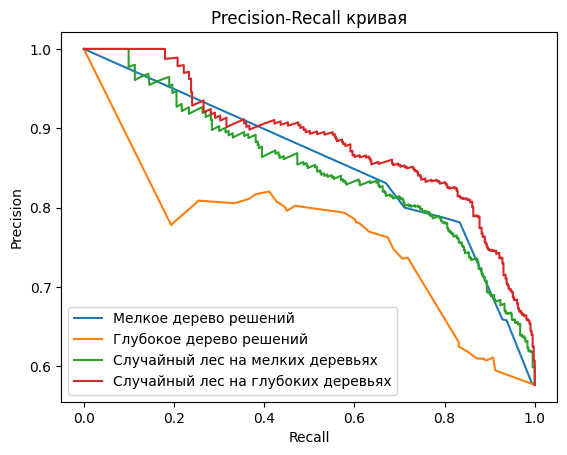

In [90]:
# Получение предсказаний на тестовом наборе данных
dt_predict = dt.predict_proba(test_data)[:, 1]
et_predict = et.predict_proba(test_data)[:, 1]
rf_predict = rf.predict_proba(test_data)[:, 1]
ef_predict = ef.predict_proba(test_data)[:, 1]



# Расчет precision-recall
dt_precision, dt_recall, dt_thresholds = precision_recall_curve(test_labels, dt_predict)
et_precision, et_recall, _ = precision_recall_curve(test_labels, et_predict)
rf_precision, rf_recall, _ = precision_recall_curve(test_labels, rf_predict)
ef_precision, ef_recall, _ = precision_recall_curve(test_labels, ef_predict)

# Построение precision-recall кривой
plt.plot(dt_recall, dt_precision, label='Мелкое дерево решений')
plt.plot(et_recall, et_precision, label='Глубокое дерево решений')
plt.plot(rf_recall, rf_precision, label='Случайный лес на мелких деревьях')
plt.plot(ef_recall, ef_precision, label='Случайный лес на глубоких деревьях')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.title('Precision-Recall кривая')

Text(0.5, 1.0, 'ROC-кривая')

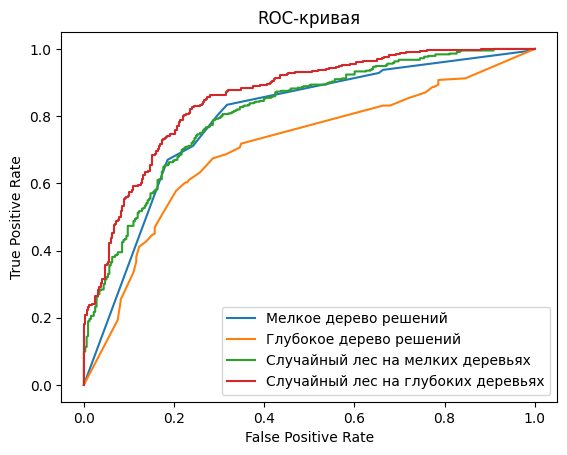

In [91]:
# Расчет ROC-кривых
dt_fpr, dt_tpr, dt_thresholds_roc = roc_curve(test_labels, dt_predict)
et_fpr, et_tpr, _ = roc_curve(test_labels, et_predict)
rf_fpr, rf_tpr, _ = roc_curve(test_labels, rf_predict)
ef_fpr, ef_tpr, _ = roc_curve(test_labels, ef_predict)

# Построение ROC-кривой
plt.plot(dt_fpr, dt_tpr, label='Мелкое дерево решений')
plt.plot(et_fpr, et_tpr, label='Глубокое дерево решений')
plt.plot(rf_fpr, rf_tpr, label='Случайный лес на мелких деревьях')
plt.plot(ef_fpr, ef_tpr, label='Случайный лес на глубоких деревьях')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('ROC-кривая')

In [92]:
clf = DecisionTreeClassifier(class_weight={0:1, 1:10}) # Взвешивание классов в модели. Установили веса для классов: 0 - 1, 1 - 10.

# Обучение модели
clf.fit(train_data, train_labels)

# Предсказание на тестовых данных
prediction = clf.predict(test_data)

# Расчет метрик
print("Metrics for desicion tree classifier:")
print(classification_report(test_labels, prediction))

print("Log loss:", log_loss(test_labels, prediction))

Metrics for desicion tree classifier:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       318
           1       0.79      0.71      0.75       433

    accuracy                           0.73       751
   macro avg       0.72      0.73      0.72       751
weighted avg       0.73      0.73      0.73       751

Log loss: 9.838813508347558
